가설 검정 : 비모수 검정(Kruskal-Wallis Test) 진행 

귀무가설: 성별에 따라 운동 빈도 그룹 간 BMI 중앙값 차이가 없다.
대립가설: 성별에 따라 운동 빈도 그룹 간 BMI 중앙값 차이가 있다.

In [37]:
import pandas as pd

file_path = '/Users/sim-yujin/Desktop/2-2 과목/통계적 데이터 분석/팀프로젝트/team-project/data/school_health.csv'

try:
    data = pd.read_csv(file_path, encoding='utf-8')
    print("데이터 로드 성공!")
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 경로를 확인하세요.")


print(data[['하루30분이상운동']].isnull().sum())

cleaned_data = data.dropna(subset=['BMI', '하루30분이상운동'])
print(f"Cleaned data size: {cleaned_data.shape}")

# 성별로 데이터 분리
male_data = cleaned_data[cleaned_data['성별'] == '남']
female_data = cleaned_data[cleaned_data['성별'] == '여']



데이터 로드 성공!
하루30분이상운동    39684
dtype: int64
Cleaned data size: (53038, 114)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# IQR 계산
Q1 = cleaned_data['BMI'].quantile(0.25)  # 1사분위수
Q3 = cleaned_data['BMI'].quantile(0.75)  # 3사분위수
IQR = Q3 - Q1

# 극단치 기준 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"BMI IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# 극단치 제거
filtered_data = cleaned_data[(cleaned_data['BMI'] >= lower_bound) & (cleaned_data['BMI'] <= upper_bound)]
print(f"극단치 제거 후 데이터 크기: {filtered_data.shape}")

# 확인: 제거된 데이터 개수
removed_outliers = cleaned_data.shape[0] - filtered_data.shape[0]
print(f"제거된 데이터 개수: {removed_outliers}")


# 성별별로 극단치 제거
# 남학생 극단치 제거
Q1_male = filtered_data[filtered_data['성별'] == '남']['BMI'].quantile(0.25)
Q3_male = filtered_data[filtered_data['성별'] == '남']['BMI'].quantile(0.75)
IQR_male = Q3_male - Q1_male
lower_bound_male = Q1_male - 1.5 * IQR_male
upper_bound_male = Q3_male + 1.5 * IQR_male

# 여학생 극단치 제거
Q1_female = filtered_data[filtered_data['성별'] == '여']['BMI'].quantile(0.25)
Q3_female = filtered_data[filtered_data['성별'] == '여']['BMI'].quantile(0.75)
IQR_female = Q3_female - Q1_female
lower_bound_female = Q1_female - 1.5 * IQR_female
upper_bound_female = Q3_female + 1.5 * IQR_female

# 남학생, 여학생 데이터 필터링
male_data = filtered_data[
    (filtered_data['성별'] == '남') & 
    (filtered_data['BMI'] >= lower_bound_male) & 
    (filtered_data['BMI'] <= upper_bound_male)
]

female_data = filtered_data[
    (filtered_data['성별'] == '여') & 
    (filtered_data['BMI'] >= lower_bound_female) & 
    (filtered_data['BMI'] <= upper_bound_female)
]

# 남학생과 여학생 데이터를 합침
filtered_data_no_outliers = pd.concat([male_data, female_data])


BMI IQR: 5.329999999999998
Lower Bound: 11.035000000000004, Upper Bound: 32.355
극단치 제거 후 데이터 크기: (52577, 114)
제거된 데이터 개수: 461
(52010, 114)


## 정규성 가정 (Normality Assumption)

In [30]:
from scipy.stats import kstest
print("\n[Kolmogorov-Smirnov Test 결과]")

# 남학생 데이터
print("\n[남학생 데이터]")
for group in male_data['하루30분이상운동'].unique():
    group_data = male_data[male_data['하루30분이상운동'] == group]['BMI']
    stat, p = kstest(group_data, 'norm', args=(group_data.mean(), group_data.std()))
    print(f"운동 빈도 그룹 {group}: KS-Statistic = {stat:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        print(f" -> 그룹 {group}는 정규성을 따릅니다.")
    else:
        print(f" -> 그룹 {group}는 정규성을 따르지 않습니다.")

# 여학생 데이터
print("\n[여학생 데이터]")
for group in female_data['하루30분이상운동'].unique():
    group_data = female_data[female_data['하루30분이상운동'] == group]['BMI']
    stat, p = kstest(group_data, 'norm', args=(group_data.mean(), group_data.std()))
    print(f"운동 빈도 그룹 {group}: KS-Statistic = {stat:.4f}, p-value = {p:.4f}")
    if p > 0.05:
        print(f" -> 그룹 {group}는 정규성을 따릅니다.")
    else:
        print(f" -> 그룹 {group}는 정규성을 따르지 않습니다.")



[Kolmogorov-Smirnov Test 결과]

[남학생 데이터]
운동 빈도 그룹 1.0: KS-Statistic = 0.0520, p-value = 0.0000
 -> 그룹 1.0는 정규성을 따르지 않습니다.
운동 빈도 그룹 3.0: KS-Statistic = 0.0464, p-value = 0.0000
 -> 그룹 3.0는 정규성을 따르지 않습니다.
운동 빈도 그룹 2.0: KS-Statistic = 0.0504, p-value = 0.0000
 -> 그룹 2.0는 정규성을 따르지 않습니다.
운동 빈도 그룹 4.0: KS-Statistic = 0.0486, p-value = 0.0000
 -> 그룹 4.0는 정규성을 따르지 않습니다.

[여학생 데이터]
운동 빈도 그룹 4.0: KS-Statistic = 0.0545, p-value = 0.0001
 -> 그룹 4.0는 정규성을 따르지 않습니다.
운동 빈도 그룹 3.0: KS-Statistic = 0.0618, p-value = 0.0000
 -> 그룹 3.0는 정규성을 따르지 않습니다.
운동 빈도 그룹 1.0: KS-Statistic = 0.0690, p-value = 0.0000
 -> 그룹 1.0는 정규성을 따르지 않습니다.
운동 빈도 그룹 2.0: KS-Statistic = 0.0567, p-value = 0.0000
 -> 그룹 2.0는 정규성을 따르지 않습니다.


## 등분산성 가정 (Homogeneity of Variance)

In [31]:
from scipy.stats import levene

# 남학생 등분산성 검정
male_groups = [male_data[male_data['하루30분이상운동'] == group]['BMI'] for group in male_data['하루30분이상운동'].unique()]
stat, p = levene(*male_groups)
print("\n[남학생 등분산성 검정 결과]")
print(f"Levene’s Test: W-Statistic = {stat:.4f}, p-value = {p:.4f}")
if p > 0.05:
    print(" -> 그룹 간 분산이 동일합니다 (등분산성 가정 충족).")
else:
    print(" -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).")

# 여학생 등분산성 검정
female_groups = [female_data[female_data['하루30분이상운동'] == group]['BMI'] for group in female_data['하루30분이상운동'].unique()]
stat, p = levene(*female_groups)
print("\n[여학생 등분산성 검정 결과]")
print(f"Levene’s Test: W-Statistic = {stat:.4f}, p-value = {p:.4f}")
if p > 0.05:
    print(" -> 그룹 간 분산이 동일합니다 (등분산성 가정 충족).")
else:
    print(" -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).")



[남학생 등분산성 검정 결과]
Levene’s Test: W-Statistic = 34.7775, p-value = 0.0000
 -> 그룹 간 분산이 동일하지 않습니다 (등분산성 가정 위반).

[여학생 등분산성 검정 결과]
Levene’s Test: W-Statistic = 2.1783, p-value = 0.0883
 -> 그룹 간 분산이 동일합니다 (등분산성 가정 충족).


## 독립성 가정 (Independence Assumption)

## 잔차의 정규성 (Residual Normality)

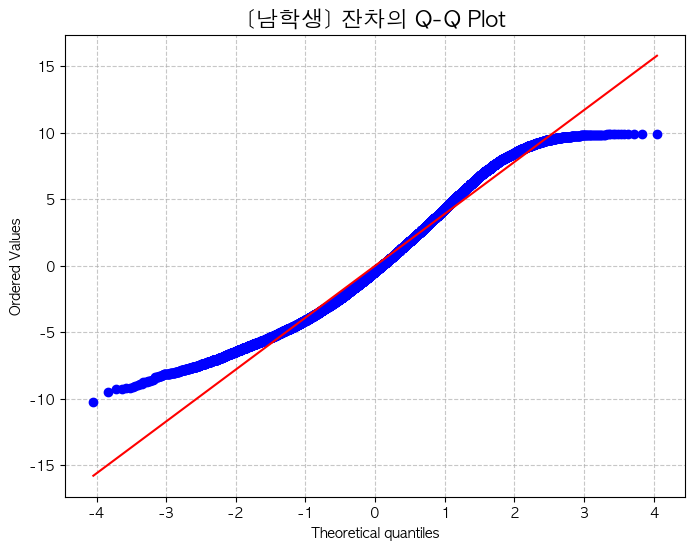

[남학생 잔차 정규성 검정] W-Statistic = 0.9787, p-value = 0.0000
 -> 잔차는 정규성을 따르지 않습니다.


/Users/sim-yujin/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 26579.
  res = hypotest_fun_out(*samples, **kwds)


In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 잔차 계산 (남학생)
male_X = sm.add_constant(male_data['하루30분이상운동'])
male_y = male_data['BMI']
male_model = sm.OLS(male_y, male_X).fit()
residuals_male = male_model.resid

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals_male, dist="norm", plot=plt)
plt.title("[남학생] 잔차의 Q-Q Plot", fontsize=16)
plt.grid(alpha=0.7, linestyle='--')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_male)
print(f"[남학생 잔차 정규성 검정] W-Statistic = {stat:.4f}, p-value = {p:.4f}")
if p > 0.05:
    print(" -> 잔차는 정규성을 따릅니다.")
else:
    print(" -> 잔차는 정규성을 따르지 않습니다.")


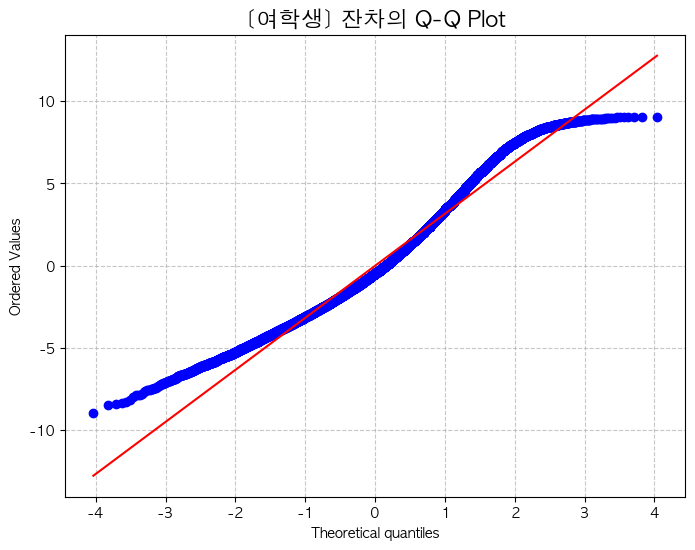

[여학생 잔차 정규성 검정] W-Statistic = 0.9734, p-value = 0.0000
 -> 잔차는 정규성을 따르지 않습니다.


/Users/sim-yujin/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25431.
  res = hypotest_fun_out(*samples, **kwds)


In [33]:
# 잔차 계산 (여학생)
female_X = sm.add_constant(female_data['하루30분이상운동'])
female_y = female_data['BMI']
female_model = sm.OLS(female_y, female_X).fit()
residuals_female = female_model.resid

# Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals_female, dist="norm", plot=plt)
plt.title("[여학생] 잔차의 Q-Q Plot", fontsize=16)
plt.grid(alpha=0.7, linestyle='--')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_female)
print(f"[여학생 잔차 정규성 검정] W-Statistic = {stat:.4f}, p-value = {p:.4f}")
if p > 0.05:
    print(" -> 잔차는 정규성을 따릅니다.")
else:
    print(" -> 잔차는 정규성을 따르지 않습니다.")


비모수 검정:

정규성 또는 등분산성을 만족하지 않아서 비모수 검정(Kruskal-Wallis Test)을 사용

In [34]:
from scipy.stats import kruskal

# 남학생 Kruskal-Wallis Test
male_group_1 = male_data[male_data['하루30분이상운동'] == 1]['BMI']
male_group_2 = male_data[male_data['하루30분이상운동'] == 2]['BMI']
male_group_3 = male_data[male_data['하루30분이상운동'] == 3]['BMI']
male_group_4 = male_data[male_data['하루30분이상운동'] == 4]['BMI']

stat_male, p_male = kruskal(male_group_1, male_group_2, male_group_3, male_group_4)
print(f"[남학생 Kruskal-Wallis Test] H-Statistic: {stat_male:.4f}, p-value: {p_male:.4f}")
if p_male < 0.05:
    print(" -> 남학생 그룹 간 BMI 중앙값에 유의미한 차이가 있습니다.")
else:
    print(" -> 남학생 그룹 간 BMI 중앙값에 유의미한 차이가 없습니다.")

# 여학생 Kruskal-Wallis Test
female_group_1 = female_data[female_data['하루30분이상운동'] == 1]['BMI']
female_group_2 = female_data[female_data['하루30분이상운동'] == 2]['BMI']
female_group_3 = female_data[female_data['하루30분이상운동'] == 3]['BMI']
female_group_4 = female_data[female_data['하루30분이상운동'] == 4]['BMI']

stat_female, p_female = kruskal(female_group_1, female_group_2, female_group_3, female_group_4)
print(f"[여학생 Kruskal-Wallis Test] H-Statistic: {stat_female:.4f}, p-value: {p_female:.4f}")
if p_female < 0.05:
    print(" -> 여학생 그룹 간 BMI 중앙값에 유의미한 차이가 있습니다.")
else:
    print(" -> 여학생 그룹 간 BMI 중앙값에 유의미한 차이가 없습니다.")


[남학생 Kruskal-Wallis Test] H-Statistic: 9.7421, p-value: 0.0209
 -> 남학생 그룹 간 BMI 중앙값에 유의미한 차이가 있습니다.
[여학생 Kruskal-Wallis Test] H-Statistic: 127.6286, p-value: 0.0000
 -> 여학생 그룹 간 BMI 중앙값에 유의미한 차이가 있습니다.


각 성별 그룹별 하루30분이상운동 값에 따른 BMI 중앙값의 유의미한 차이를 확인할 수 있습니다.

In [26]:
from scikit_posthocs import posthoc_dunn
import pandas as pd

# 남학생 데이터
male_dunn_results = posthoc_dunn(
    [male_group_1, male_group_2, male_group_3, male_group_4], p_adjust='bonferroni'
)
print("[남학생 Dunn’s Test 결과]")
print(pd.DataFrame(male_dunn_results, index=[1, 2, 3, 4], columns=[1, 2, 3, 4]))

# 여학생 데이터
female_dunn_results = posthoc_dunn(
    [female_group_1, female_group_2, female_group_3, female_group_4], p_adjust='bonferroni'
)
print("\n[여학생 Dunn’s Test 결과]")
print(pd.DataFrame(female_dunn_results, index=[1, 2, 3, 4], columns=[1, 2, 3, 4]))


[남학생 Dunn’s Test 결과]
          1         2         3         4
1  1.000000  0.300897  0.023256  0.108919
2  0.300897  1.000000  1.000000  1.000000
3  0.023256  1.000000  1.000000  1.000000
4  0.108919  1.000000  1.000000  1.000000

[여학생 Dunn’s Test 결과]
              1             2             3             4
1  1.000000e+00  3.877654e-17  2.686473e-17  4.427146e-09
2  3.877654e-17  1.000000e+00  1.614312e-01  1.000000e+00
3  2.686473e-17  1.614312e-01  1.000000e+00  1.000000e+00
4  4.427146e-09  1.000000e+00  1.000000e+00  1.000000e+00


In [35]:
# 남학생 그룹별 중앙값
male_medians = male_data.groupby('하루30분이상운동')['BMI'].median()
print("[남학생] 각 그룹의 BMI 중앙값:")
print(male_medians)

# 여학생 그룹별 중앙값
female_medians = female_data.groupby('하루30분이상운동')['BMI'].median()
print("\n[여학생] 각 그룹의 BMI 중앙값:")
print(female_medians)


[남학생] 각 그룹의 BMI 중앙값:
하루30분이상운동
1.0    21.93
2.0    22.08
3.0    22.13
4.0    22.04
Name: BMI, dtype: float64

[여학생] 각 그룹의 BMI 중앙값:
하루30분이상운동
1.0    20.30
2.0    20.72
3.0    20.83
4.0    20.90
Name: BMI, dtype: float64


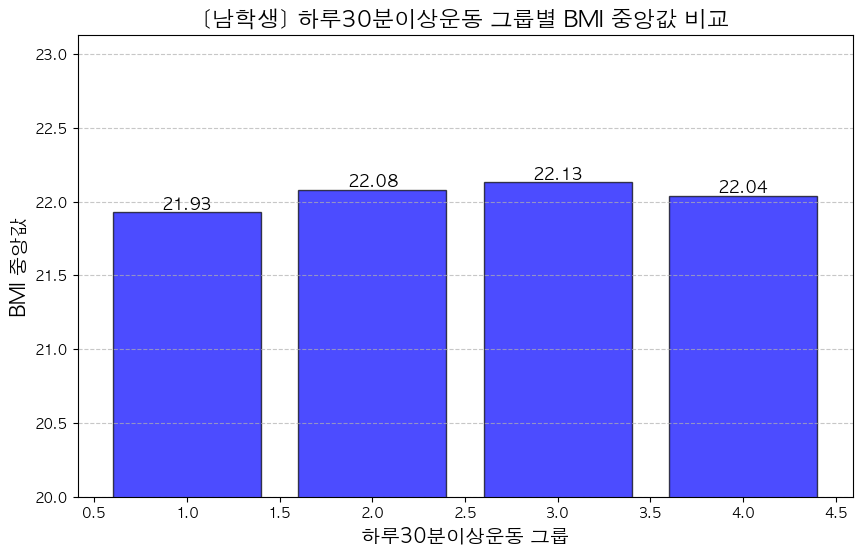

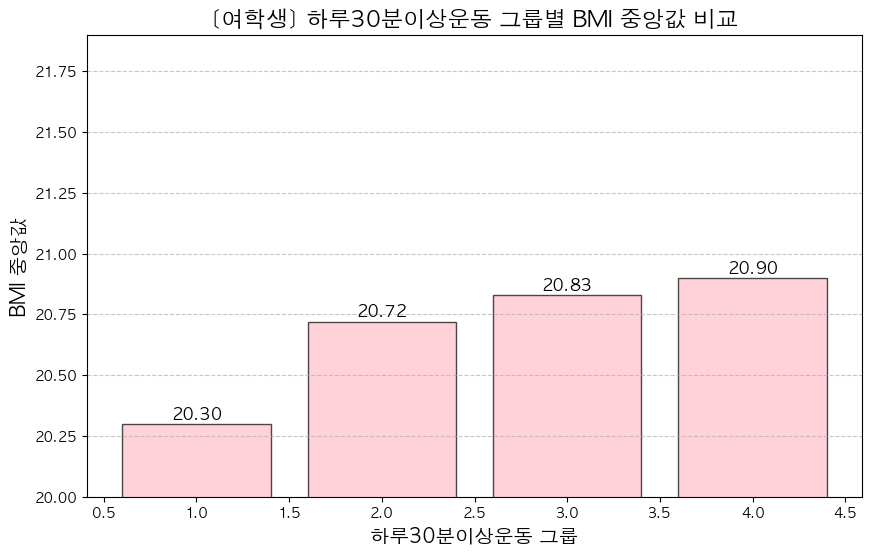

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# 남학생 중앙값 비교
plt.figure(figsize=(10, 6))
bars = plt.bar(male_medians.index, male_medians.values, color='blue', alpha=0.7, edgecolor='black')
plt.title('[남학생] 하루30분이상운동 그룹별 BMI 중앙값 비교', fontsize=16)
plt.xlabel('하루30분이상운동 그룹', fontsize=14)
plt.ylabel('BMI 중앙값', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 값 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, 
             f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.ylim(20, max(male_medians.values) + 1)  # Y축 범위 조정
plt.show()

# 여학생 중앙값 비교
plt.figure(figsize=(10, 6))
bars = plt.bar(female_medians.index, female_medians.values, color='pink', alpha=0.7, edgecolor='black')
plt.title('[여학생] 하루30분이상운동 그룹별 BMI 중앙값 비교', fontsize=16)
plt.xlabel('하루30분이상운동 그룹', fontsize=14)
plt.ylabel('BMI 중앙값', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 값 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, 
             f'{bar.get_height():.2f}', ha='center', fontsize=12)

plt.ylim(20, max(female_medians.values) + 1)  # Y축 범위 조정
plt.show()


결과적으로 30분 이상 운동한 빈도가 많을 수록 대체적으로 BMI가 더 올라가는 경항을 확인할 수 있다